In [5]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/istockphoto-145240587-612x612.jpg
/kaggle/input/dataset/istockphoto-139703184-612x612.jpg
/kaggle/input/dataset/istockphoto-896330416-612x612.jpg
/kaggle/input/dataset/istockphoto-922486848-612x612.jpg
/kaggle/input/dataset/istockphoto-867028292-612x612.jpg
/kaggle/input/dataset/istockphoto-2017196787-612x612.jpg
/kaggle/input/dataset/istockphoto-182702398-612x612.jpg
/kaggle/input/dataset/istockphoto-2030329197-612x612.jpg
/kaggle/input/dataset/istockphoto-861923530-612x612.jpg
/kaggle/input/dataset/istockphoto-672054060-612x612.jpg
/kaggle/input/dataset/istockphoto-2178245361-612x612.jpg
/kaggle/input/dataset/istockphoto-1369921298-612x612.jpg
/kaggle/input/dataset/istockphoto-1323659378-612x612.jpg
/kaggle/input/dataset/istockphoto-153971297-612x612.jpg
/kaggle/input/dataset/istockphoto-2179795449-612x612.jpg
/kaggle/input/dataset/istockphoto-1710224047-612x612.jpg
/kaggle/input/dataset/istockphoto-1210381929-612x612.jpg
/kaggle/input/dataset/istockphoto-114357

# **#CleanSeaVision- AI-Powered Ocean Waste Detection**

In [6]:
import tensorflow as tf

MODEL_PATH = "/kaggle/input/cleanseavision2/tensorflow2/default/1/model_unquant.tflite"
LABELS_PATH = "/kaggle/input/cleanseavision2/tensorflow2/default/1/labels.txt"

interpreter = tf.lite.Interpreter(model_path=MODEL_PATH)
interpreter.allocate_tensors()

print("✅ TFLite model loaded successfully!")

✅ TFLite model loaded successfully!


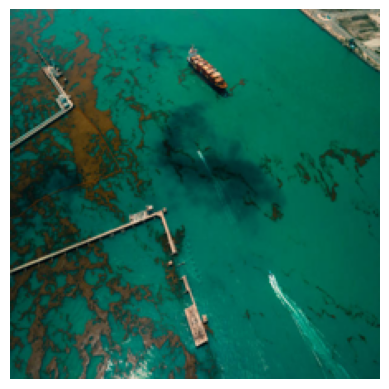

Prediction: 0 Oil_Spill (95.65% confidence)
Tip: Reduce, reuse, recycle whenever possible.


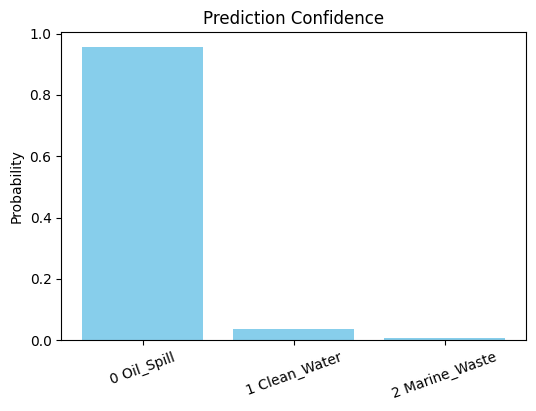

In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Eco-tips mapped to your classes (edit these names to match your labels file)
eco_tips = {
    "Oil_Spill": "Tip: Report oil spills immediately to reduce marine damage.",
    "Clean_Water": "Tip: Keep the oceans clean—avoid single-use plastics.",
    "Marine_Waste": "Tip: Join local beach cleanups and recycle waste properly."
}

def predict_image(image_path):
    img = Image.open(image_path).resize((224,224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    input_data = np.expand_dims(np.asarray(img, dtype=np.float32) / 255.0, axis=0)

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])[0]

    pred_idx = int(np.argmax(output_data))
    label = labels[pred_idx]
    confidence = float(output_data[pred_idx])
    tip = eco_tips.get(label, "Tip: Reduce, reuse, recycle whenever possible.")

    print(f"Prediction: {label} ({confidence*100:.2f}% confidence)")
    print(tip)

    # return data for plotting
    return output_data, label

def plot_confidence(output_data, labels):
    plt.figure(figsize=(6,4))
    plt.bar(labels, output_data, color='skyblue')
    plt.title("Prediction Confidence")
    plt.ylabel("Probability")
    plt.xticks(rotation=20)
    plt.show()

output_data, label = predict_image("/kaggle/input/dataset/istockphoto-1323659378-612x612.jpg")
plot_confidence(output_data, labels)

In [19]:
import numpy as np
from PIL import Image

# Path to your uploaded image (update with your uploaded filename)
image_path = "/kaggle/input/dataset/istockphoto-1323659378-612x612.jpg"

# Load and preprocess the image
img = Image.open(image_path).resize((224, 224))
input_data = np.expand_dims(img, axis=0)
input_data = np.float32(input_data) / 255.0

# Run inference
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Get predicted label
predicted_label = labels[np.argmax(output_data)]
confidence = np.max(output_data) * 100

print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")

Predicted Class: 0 Oil_Spill
Confidence: 95.65%


In [20]:
# Load labels
with open(LABELS_PATH, "r") as f:
    labels = [line.strip() for line in f.readlines()]

# Check model input details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Labels:", labels)
print("Input shape:", input_details[0]['shape'])

Labels: ['0 Oil_Spill', '1 Clean_Water', '2 Marine_Waste']
Input shape: [  1 224 224   3]


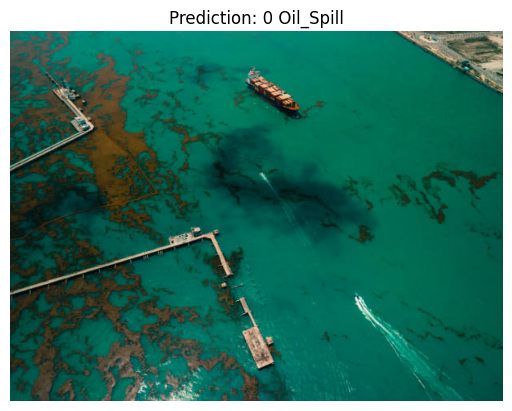

In [21]:
import matplotlib.pyplot as plt

plt.imshow(Image.open(image_path))
plt.title(f"Prediction: {predicted_label}")
plt.axis("off")
plt.show()

**The Model successfully detects different types of marine waste and provides eco-friendly tips.****